# KNN Classification

In [34]:
from warnings import filterwarnings
filterwarnings('ignore')

In [35]:
import pandas as pd
df = pd.read_csv('../Datasets/iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
X = df.drop(columns=['target'])
y = df[['target']]

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean')),
                         ('scaler', StandardScaler())])
X = num_pipeline.fit_transform(X)
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [38]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = pd.DataFrame(X, columns=cols)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=50)
model.fit(X_train, y_train)

,n_neighbors,50
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [41]:
model.score(X_test, y_test)

0.84

In [42]:
model.score(X_train, y_train)

0.86

### Hyperparameter Tunning with Gridsearchcv

In [43]:
param = {
    'n_neighbors': range(2, 11)
}

In [44]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
gscv = GridSearchCV(knn, param_grid=param, cv=5, scoring='f1_macro')
gscv.fit(X_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': range(2, 11)}"
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,3


In [45]:
best_params = gscv.best_params_
best_params

{'n_neighbors': 3}

In [46]:
best_knn = gscv.best_estimator_
best_knn

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [47]:
best_knn.score(X_test, y_test)

0.98

In [48]:
best_knn.score(X_train, y_train)

0.95

In [49]:
ypred_tr = best_knn.predict(X_train)
ypred_ts = best_knn.predict(X_test)

In [50]:
ypred_tr[0:5]

array([1, 2, 1, 0, 2])

In [51]:
y_train.head()

,target
96,1
105,2
66,1
0,0
122,2


In [52]:
ypred_ts[0:5]

array([1, 0, 2, 1, 1])

In [53]:
y_test.head()

,target
73,1
18,0
118,2
78,1
76,1


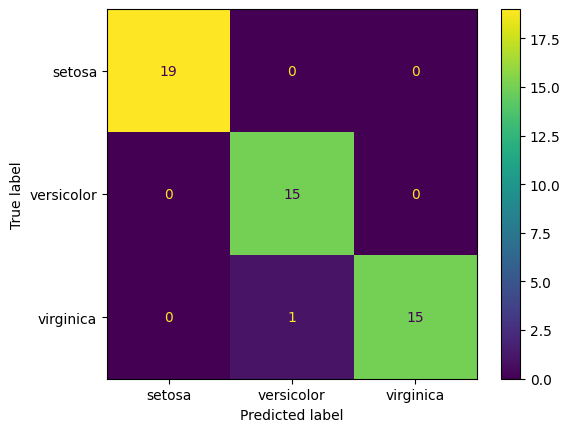

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, ypred_ts)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['setosa','versicolor','virginica'])
cmd.plot()

In [59]:
X_new = pd.read_csv('../Datasets/iris_sample.csv')
X_new.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8


In [60]:
X_new = num_pipeline.transform(X_new)
X_new

array([[-0.41600969, -1.28296331,  0.13754657,  0.13250973],
       [ 1.2803405 ,  0.09821729,  0.76275827,  1.44883158],
       [-0.90068117, -1.28296331, -0.4308277 , -0.13075464],
       [-1.74885626, -0.36217625,  0.        , -1.3154443 ],
       [ 0.06866179, -0.13197948,  0.76275827,  0.79067065],
       [-0.41600969,  1.01900435, -1.39706395, -1.3154443 ],
       [-0.29484182,  0.        , -0.08980313,  0.13250973],
       [-0.05250608, -0.13197948,  0.8195957 ,  1.05393502],
       [ 0.55333328,  1.47939788, -1.2833891 , -1.3154443 ],
       [-0.90068117,  0.78880759, -1.2833891 ,  0.        ],
       [ 0.31099753, -0.59237301,  0.13754657,  0.13250973],
       [-0.41600969, -1.51316008, -0.03296571,  2.37025687],
       [ 2.24968346, -0.13197948,  1.33113254,  1.44883158],
       [ 0.18982966,  0.78880759,  0.64908342,  0.3957741 ],
       [ 0.18982966, -1.97355361,  0.70592084,  0.3957741 ]])

In [61]:
X_new = pd.DataFrame(X_new, columns=cols)
X_new.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671


In [63]:
species = best_knn.predict(X_new)
species

array([1, 2, 1, 0, 2, 0, 1, 2, 0, 0, 1, 2, 2, 1, 1])

In [65]:
X_new['species']=species
X_new.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.416010,-1.282963,0.137547,0.132510,1
1,1.280340,0.098217,0.762758,1.448832,2
2,-0.900681,-1.282963,-0.430828,-0.130755,1
3,-1.748856,-0.362176,0.000000,-1.315444,0
4,0.068662,-0.131979,0.762758,0.790671,2


In [66]:
X_new.to_csv('../Datasets/pred_iris.csv', index=False)